In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

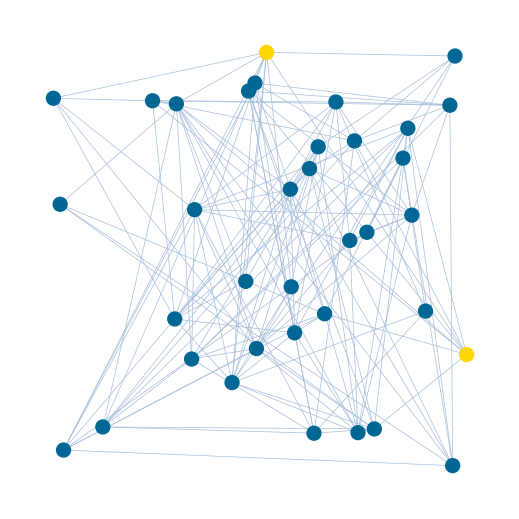

In [33]:
# Set the probability for each edge
probability = 0.2

# Node size
node_size = 100

# Set edge thickness to 1pt
edge_width = 0.5

# Set the number of nodes
num_nodes = 36

# Create a random graph with 40 nodes and a 50% chance for each edge
G = nx.erdos_renyi_graph(num_nodes, probability)

plt.figure(figsize=(5, 5))

# Draw the graph using a random layout
pos = nx.random_layout(G)

# Initialize node colors with a default color
node_colors = ['#006795'] * num_nodes

# Set 20% of the nodes to have a gold color
num_gold_nodes = int(0.075 * num_nodes)
gold_nodes = list(G.nodes())[:num_gold_nodes]
for node in gold_nodes:
    node_colors[node] = 'gold'


# Draw the graph with node colors
nx.draw(G, pos, with_labels=False, font_weight='normal', width=edge_width, node_size=node_size, node_color=node_colors, edge_color='#a6bddb')

# Save the plot as a PNG file
plt.savefig('HO.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [50]:
# Sattellite map with Marco Polo example
import plotly.graph_objects as go

# Assuming df is your DataFrame with columns "Place", "Latitude", "Longitude", and "Date"
# Example DataFrame creation:
data = {
    "Place": ["Venice", "Jerusalem", "Baghdad", "Bukhara", "Herat", "Samarkand", "Kashgar", "Yazd", "Xanadu"],
    "Latitude": [45.4408, 31.7683, 33.3152, 39.7681, 34.3416, 39.6270, 39.4704, 31.8974, 40.4172],
    "Longitude": [12.3155, 35.2137, 44.3661, 64.4715, 62.2031, 66.9749, 75.5527, 54.3560, 116.8471],
    "Date": ["1292", "1295", "1293", "1296", "1297", "1294", "1299", "1298", "1300"]
}

data_return_journey = {
    "Place": ["Xanadu", "Kashgar", "Samarkand", "Herat", "Bukhara", "Baghdad", "Jerusalem", "Venice"],
    "Latitude": [40.4172, 39.4704, 39.6270, 34.3416, 39.7681, 33.3152, 31.7683, 45.4408],
    "Longitude": [116.8471, 75.5527, 66.9749, 62.2031, 64.4715, 44.3661, 35.2137, 12.3155],
    "Date": ["1305", "1306", "1307", "1308", "1309", "1310", "1311", "1312"]
}

df = pd.DataFrame(data)
df_return = pd.DataFrame(data_return_journey)

# Create a scatter mapbox plot
fig = go.Figure()

fig.add_trace(go.Scattermapbox(
    mode="markers+lines",
    lat=df["Latitude"],
    lon=df["Longitude"],
    marker=dict(size=10, color="#38a6a5"),
    text=df["Place"] + "<br>Date: " + df["Date"],
))

fig.add_trace(go.Scattermapbox(
    mode="markers+lines",
    lat=df_return["Latitude"],
    lon=df_return["Longitude"],
    marker=dict(size=10, color="#a5386c"),
    text=df_return["Place"] + "<br>Date: " + df_return["Date"],
))

# Define the map layout with the Marble basemap
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    mapbox_center={"lat": sum(latitudes) / len(latitudes), "lon": sum(longitudes) / len(longitudes)},
    mapbox_zoom=2,
    # mapbox_style="open-street-map",
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
    ]
)

# Legend settings
fig.update_layout(
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="right",
        x=0
    )
)
# Show the plot
fig.show()